In [1]:
from matplotlib import pyplot as plt
from matplotlib.lines import Line2D
import numpy as np


In the examples directory you can find the npy tables of two events: Event54 and Event751. 


In [2]:
summed={}
event_id= 'Event751'#name of the event you want to plot (usefull when using catalog tables of significance)
phase= 'afterglow' #can be either afterglow or prompt

In [3]:

data= np.load('examples/Evt751.noMoon.thresh10.npy', #the plotted one is Event751 whose table is in examples dir                                 
              allow_pickle=True, encoding='latin1', fix_imports=True).flat[0]

events = list(data.keys())
sites = list(data[events[0]].keys())



The following lines generate a custom legend for the plots.

In [4]:
custom_lines = [Line2D([0], [0], color='red', lw=4, alpha=0.3),
                Line2D([0], [0], color='yellow', lw=4,alpha=0.3),
                Line2D([0], [0], color='green', lw=4,alpha=0.3),
                Line2D([0], [0], marker='o', color='red',
                          markerfacecolor='red', markersize=5),
                Line2D([0], [0], marker='o', color='g',
                          markerfacecolor='g', markersize=5)]

Here the event significance, in a separate way for EACH site, is plot as a function of time.

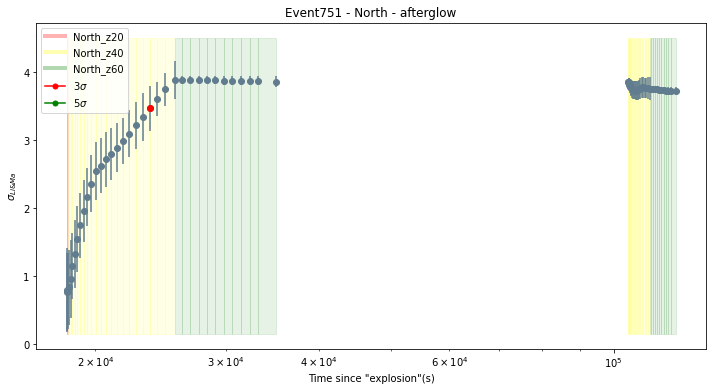

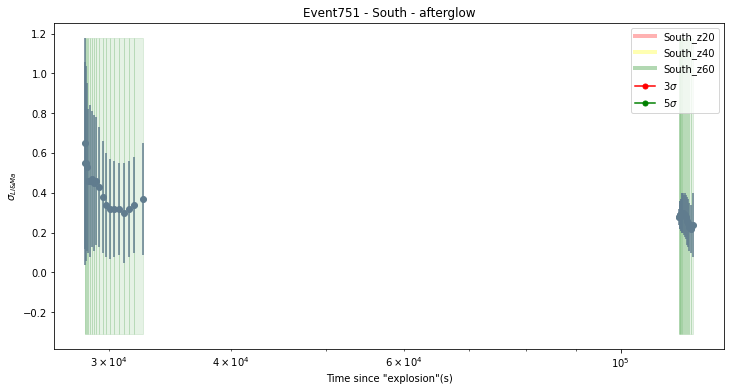

In [5]:
for event in events:
    summed[event]={}
    if event == event_id:
        for site in sites:

            summed[event][site]={'t_start':[],'t_stop':[],'irf':[],'significance':[], 'variance':[]}

            for night in data[event][site]:
                if night != 'first_night_start':
                    if type(data[event][site][night]['irf']) == float:
                        print(f'\tThis contains NaNs event---> '
                              'the source is not observable at the site {site} during {night}.')
                        summed[event][site]['significance']=0.0
                    else:
                        summed[event][site]['t_stop'].append(data[event][site][night]['t_stop'])
                        summed[event][site]['t_start'].append(data[event][site][night]['t_start'])
                        summed[event][site]['irf'].append(data[event][site][night]['irf'])
                        if type(summed[event][site]['significance'])==float:
                            summed[event][site]['significance']=[]
                        summed[event][site]['significance'].append(data[event][site][night]['significance'])
                        summed[event][site]['variance'].append(data[event][site][night]['variance'])



                    if '3sigma' in data[event][site][night].keys() and '3sigma' not in summed[event][site].keys():
                        summed[event][site]['3sigma']=[data[event][site][night]['3sigma'][0],
                                                       data[event][site][night]['3sigma'][1]]
                    if '5sigma' in data[event][site][night].keys() and '5sigma' not in summed[event][site].keys():
                        summed[event][site]['5sigma']=[data[event][site][night]['5sigma'][0],
                                                       data[event][site][night]['5sigma'][1]]

            if type(summed[event][site]['significance']) != float:
                fig, axes = plt.subplots(1 ,figsize=(12,6))
                summed[event][site]['t_stop'] = np.array([ elem for singleList in summed[event][site]['t_stop'] 
                                                          for elem in singleList])
                summed[event][site]['t_start'] = np.array([ elem for singleList in summed[event][site]['t_start'] 
                                                         for elem in singleList])
                summed[event][site]['irf'] = np.array([ elem for singleList in summed[event][site]['irf'] 
                                                       for elem in singleList])
                summed[event][site]['significance'] = np.array([ elem for singleList 
                                                                in summed[event][site]['significance'] 
                                                                for elem in singleList])
                summed[event][site]['variance'] = np.array([ elem for singleList 
                                                            in summed[event][site]['variance'] 
                                                            for elem in singleList])

                color_min = min(summed[event][site]['significance']) - max(summed[event][site]['variance'])
                color_max = max(summed[event][site]['significance']) + max(summed[event][site]['variance'])


                for i in range(len(summed[event][site]['irf'])):
                    t_start= summed[event][site]['t_start'][i]
                    t_stop = summed[event][site]['t_stop'][i]


                    if 'z20' in summed[event][site]['irf'][i]:
                        axes.fill_between([t_start,t_stop], color_min, color_max, color='red', alpha=0.1,
                                          label=f'IRF z20')
                    elif 'z40' in summed[event][site]['irf'][i]:
                        axes.fill_between([t_start,t_stop], color_min, color_max, color='yellow', alpha=0.1,
                                          label='IRF z40')
                    elif 'z60' in summed[event][site]['irf'][i]:
                        axes.fill_between([t_start,t_stop], color_min, color_max, color='green', alpha=0.1,
                                          label='IRF z60')


                axes.errorbar (summed[event][site]['t_stop'], summed[event][site]['significance'], 
                                       yerr= summed[event][site]['variance'], color='#607c8e',fmt='o')
                if '3sigma' in summed[event][site].keys():
                    axes.errorbar (summed[event][site]['3sigma'][0], summed[event][site]['3sigma'][1],
                                       color='red',fmt='o')
                if '5sigma' in summed[event][site].keys():    
                    axes.errorbar (summed[event][site]['5sigma'][0], summed[event][site]['5sigma'][1],
                                   color='g',fmt='o')

                axes.set_xlabel(r'Time since "explosion"(s)')
                axes.set_ylabel(r'$\sigma_{Li&Ma}$')
                axes.set_xscale('log')
                axes.legend(custom_lines, [f'{site}_z20', f'{site}_z40', f'{site}_z60',r'$3\sigma$', r'$5\sigma$'])
                axes.set_title(f'{event} - {site} - {phase}')
                #plt.savefig(f'examples/{event}-{site}-{phase}.png')  



plt.show()


Event751 has been simulated 100 times with 100 different seed values, randomly generated. Variance here reported is reffered to the different values obtained for each seed. 
Event54 has been simulated only once, hence variance is null.
The last part of the code plots the detailed behaviour of significane at each single night.

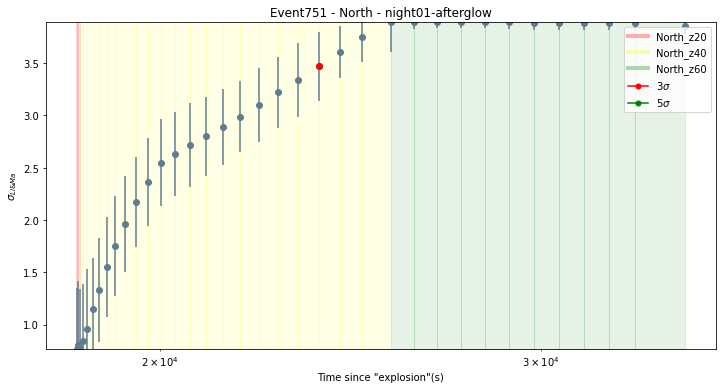

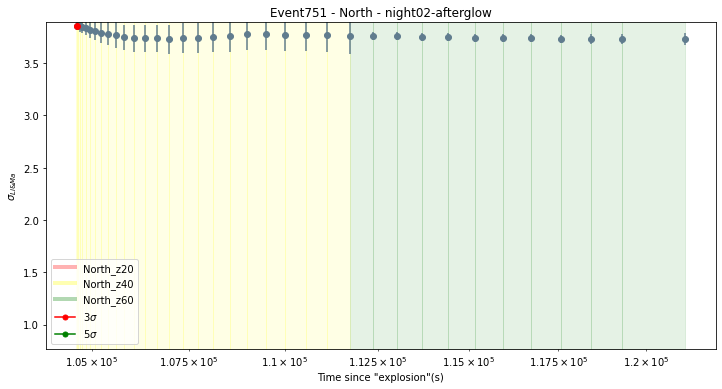

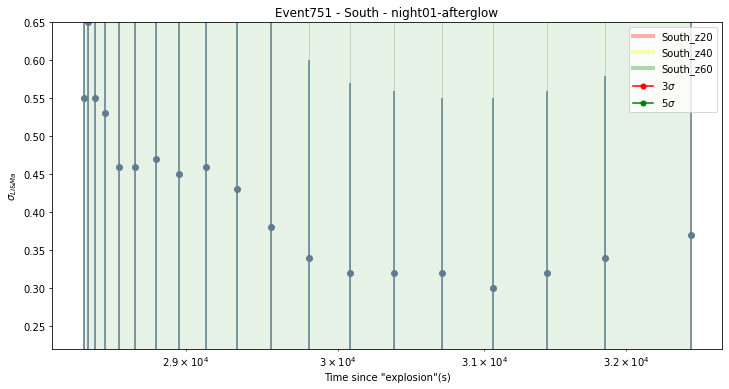

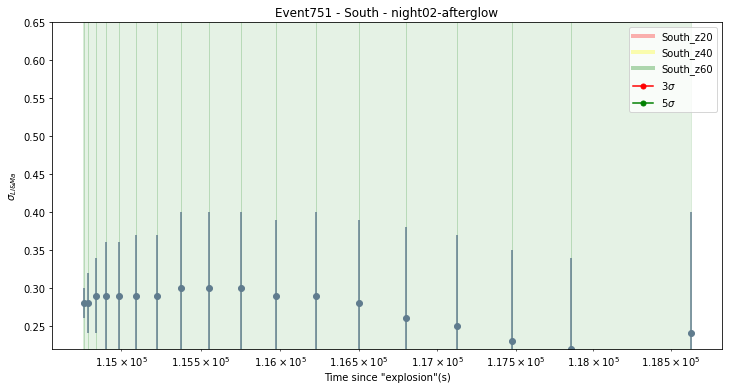

In [6]:
for event in events:
    #print (summed[event].keys())
    if event == event_id:
        for site in sites:
            for night in data[event][site]:
                if night != 'first_night_start':

                    if type(data[event][site][night]['irf']) == float:
                        print(f'\tThis contains NaNs event--->'
                              ' the source is not observable at the site {site} during {night}.')
                    else:

                        fig, axes = plt.subplots(1 ,figsize=(12,6))
                        for i in range(len(data[event][site][night]['irf'])):
                            t_start= data[event][site][night]['t_start'][i]
                            t_stop = data[event][site][night]['t_stop'][i]
                            color_min = min(summed[event][site]['significance']) 
                            - max(summed[event][site]['variance'])
                            color_max = max(summed[event][site]['significance']) 
                            + max(summed[event][site]['variance'])
                            
                            if 'z20' in data[event][site][night]['irf'][i]:
                                axes.fill_between([t_start,t_stop],color_min,color_max, color='red',alpha=0.1) 

                            elif 'z40' in data[event][site][night]['irf'][i]:
                                axes.fill_between([t_start,t_stop],color_min,color_max,color='yellow',alpha=0.1)

                            elif 'z60' in data[event][site][night]['irf'][i]:
                                axes.fill_between([t_start,t_stop],color_min,color_max,color='green',alpha=0.1)


                        axes.errorbar (data[event][site][night]['t_stop'], 
                                       data[event][site][night]['significance'], 
                                       yerr= data[event][site][night]['variance'], color='#607c8e',fmt='o')
                        if '3sigma' in data[event][site][night].keys():
                            axes.errorbar (data[event][site][night]['3sigma'][0], 
                                           data[event][site][night]['3sigma'][1], 
                                           color='red',fmt='o')
                        if '5sigma' in data[event][site][night].keys():
                            axes.errorbar (data[event][site][night]['5sigma'][0], 
                                           data[event][site][night]['5sigma'][1], 
                                           color='g',fmt='o')
                        axes.set_xlabel(r'Time since "explosion"(s)')
                        axes.set_ylabel(r'$\sigma_{Li&Ma}$')
                        axes.set_xscale('log')
                        axes.set_ylim(color_min, color_max)
                        axes.legend(custom_lines,
                                    [f'{site}_z20', f'{site}_z40', f'{site}_z60',r'$3\sigma$', r'$5\sigma$'])
                        axes.set_title(f'{event} - {site} - {night}-{phase}')
                        #plt.savefig(f'examples/{event}-{site}-{night}-{phase}.png')    



plt.show()
